# 時系列データ入門
## 参考書籍
* [現場ですぐ使える時系列データ分析～データサイエンティストのための基礎知識～](https://amzn.to/2NIADWr)
* [時系列解析: 自己回帰型モデル・状態空間モデル・異常検知](https://amzn.to/3svRLxw)


In [5]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
month_map = {'Jan': 1, 
 'Feb': 2, 
 'Mar': 3, 
 'Apr': 4, 
 'May': 5, 
 'Jun': 6, 
 'Jul': 7, 
 'Aug': 8, 
 'Sep': 9,
 'Oct': 10, 
 'Nov': 11, 
 'Dec': 12}

In [27]:
df = sns.load_dataset('flights')
df['month_num'] = df.month.map(month_map)
df = df.sort_values(['year', 'month_num']).reset_index()
df.rename(columns={'index': 'time_index'}, inplace=True)

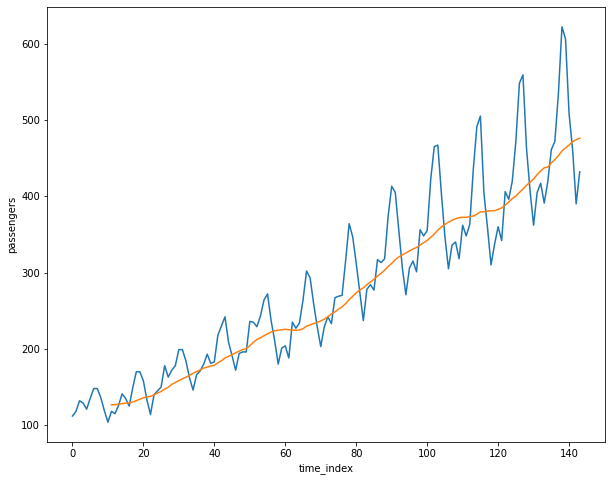

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x='time_index', y='passengers', data=df, ax=ax)
df['passengers'].rolling(12).mean().plot(ax=ax)

# 中心化移動平均

In [16]:
df_ice = pd.read_csv("https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv", 
                       encoding="CP932",
                       header=1
                      )
df_ice.rename(columns={'年': 'year', '月': 'month', 'アイスクリーム': 'expenditure_yen'}, inplace=True)

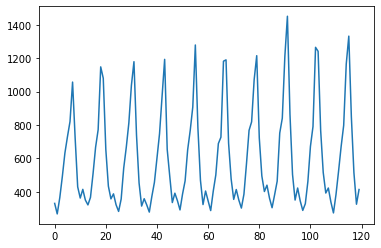

In [19]:
df_ice.expenditure_yen.plot()

In [21]:
df_ma = df_ice.expenditure_yen.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean() 

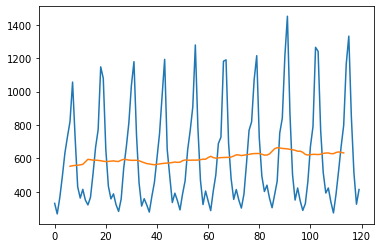

In [26]:
df_ice.expenditure_yen.plot()
df_cma.plot()
# 中心化移動平均はオレンジ

# 季節調整